<a href="https://colab.research.google.com/github/RahulkMathur/Advance_Data_Science_Course-Intellipaat-/blob/Quiz/Housing_Prices__LinearRegression_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

In [60]:
df = pd.read_csv("/content/housing.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [61]:
df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# Exploratory Data Analysis
# Data cleaning
# Data preprocessing
# Data Visualization

In [ ]:
df.info()

In [63]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [64]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.shape

(21613, 21)

In [67]:
df['date'].duplicated().value_counts()

,count
date,
True,21241
False,372


In [68]:
df.drop(['date'], axis = 1,inplace = True) #drop the unnecessary column.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [70]:
df['yr_built'].nunique()

116

In [71]:
df['yr_built'].value_counts()

,count
yr_built,
2014,559
2006,454
2005,450
2004,433
2003,422
...,...
1933,30
1901,29
1902,27


In [72]:
df['yr_renovated'].nunique()

70

In [73]:
df['zipcode'].nunique()

70

In [74]:
df['grade'].nunique()

12

In [75]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [76]:
df['bedrooms'].nunique()

13

In [77]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

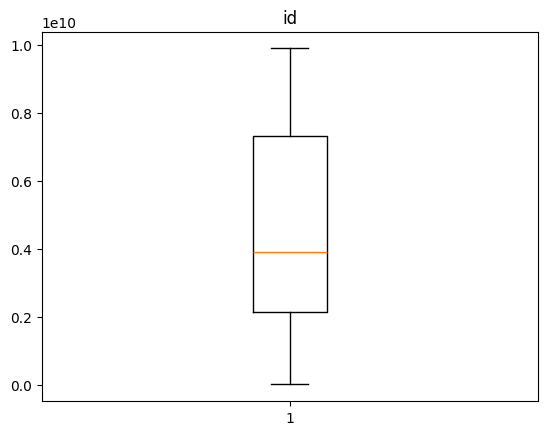

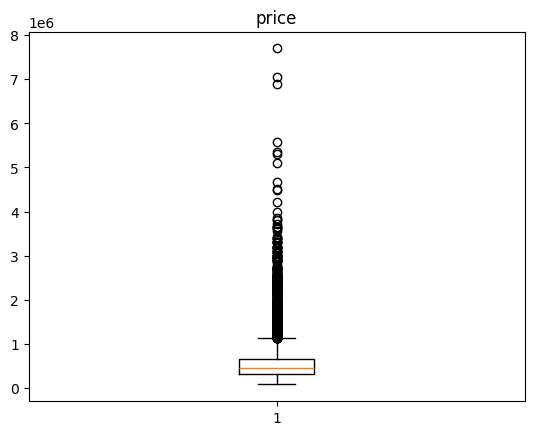

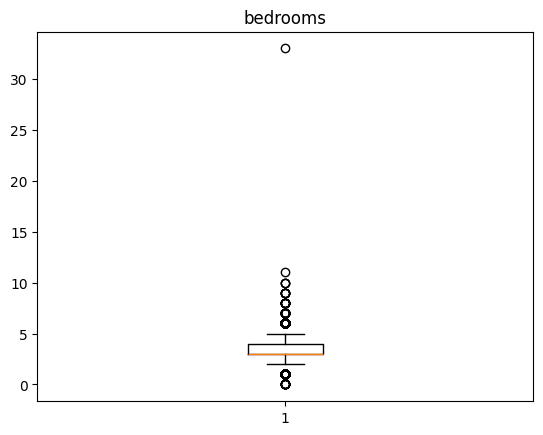

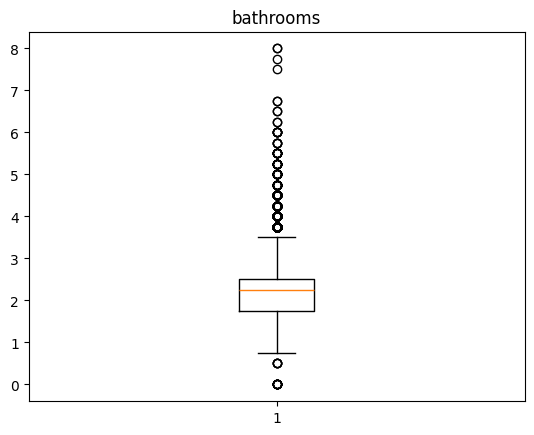

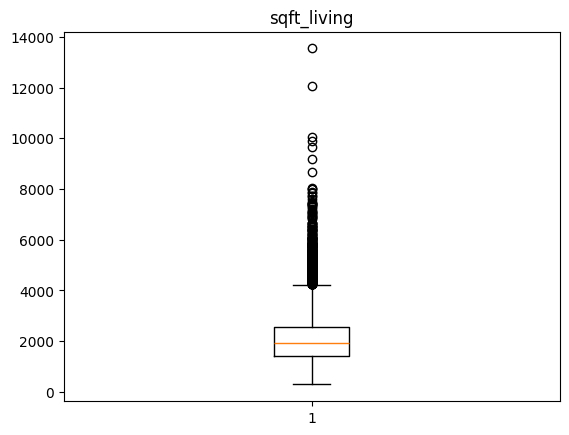

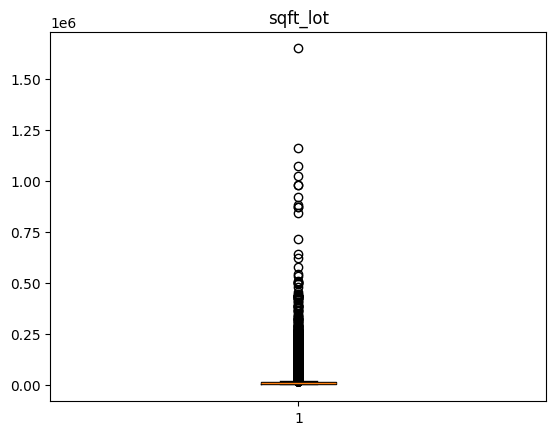

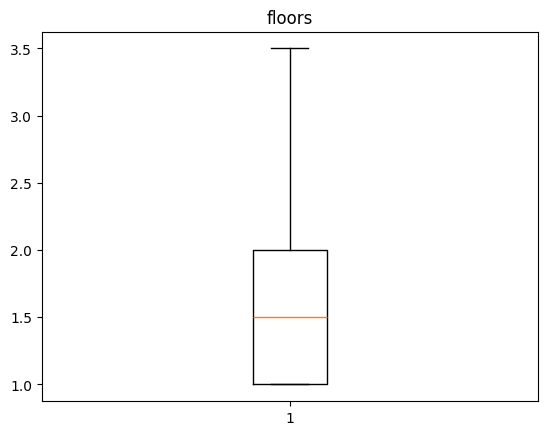

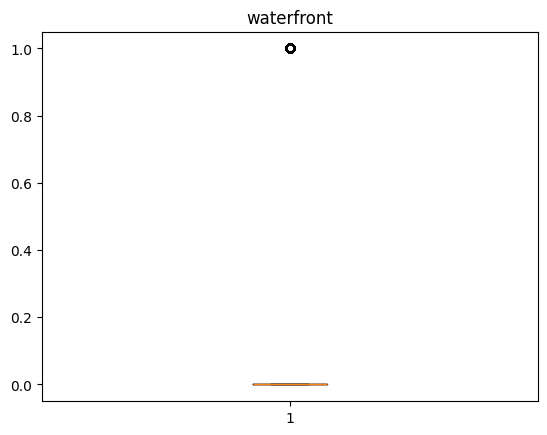

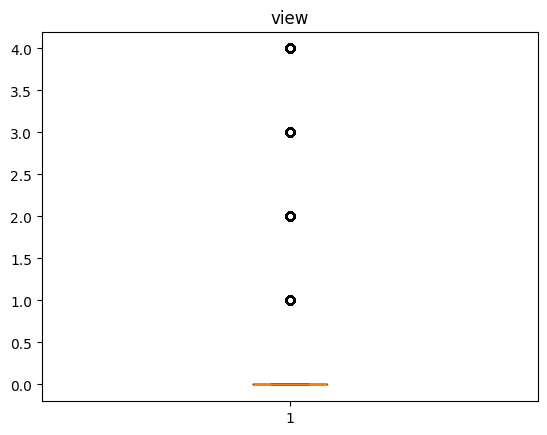

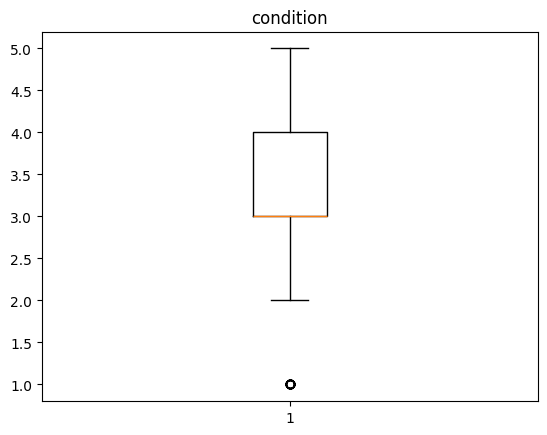

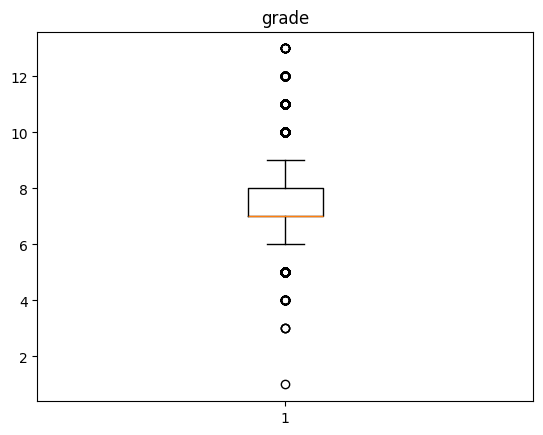

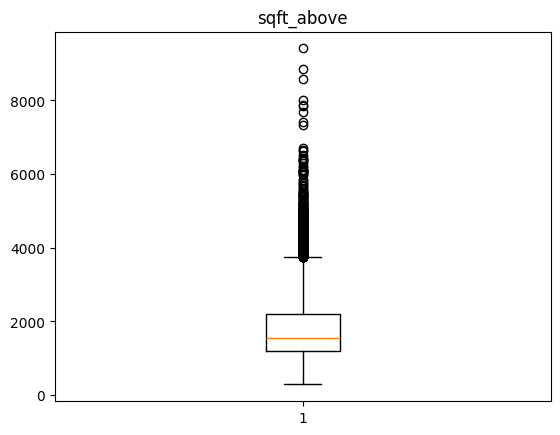

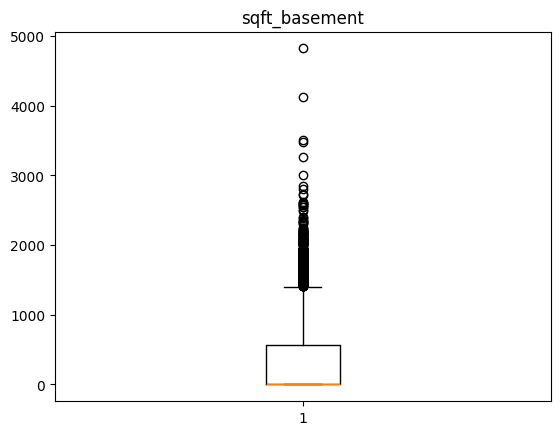

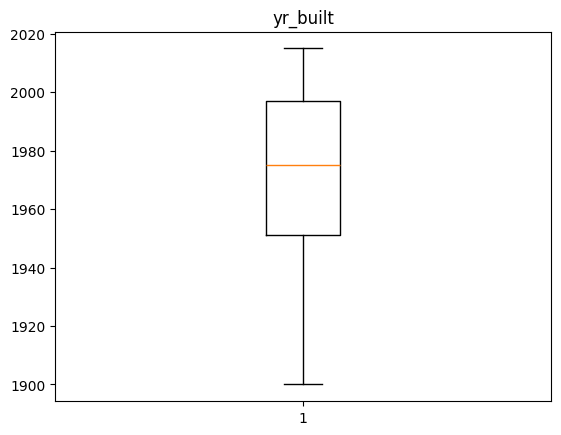

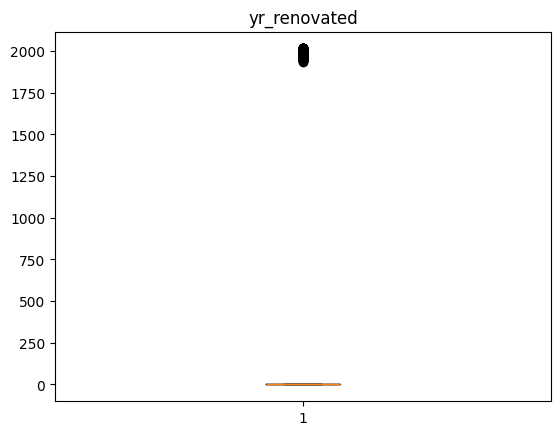

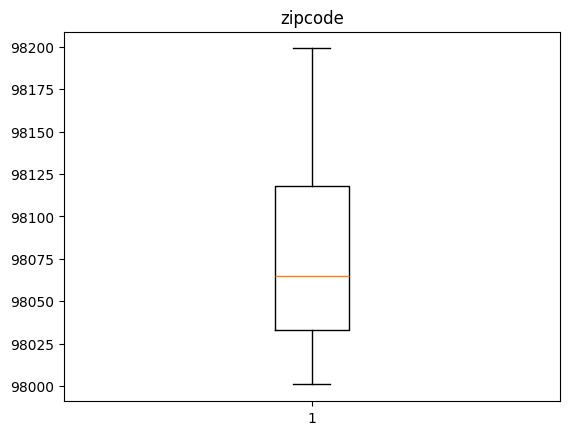

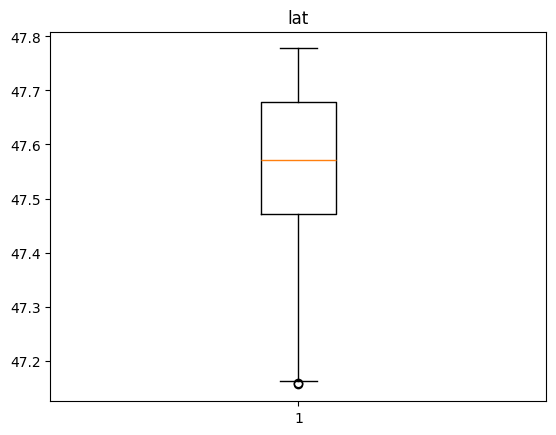

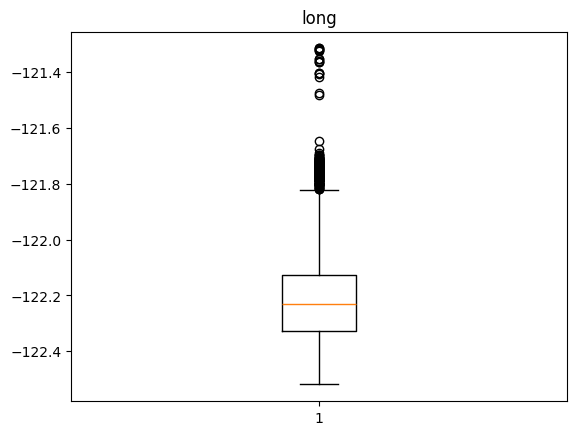

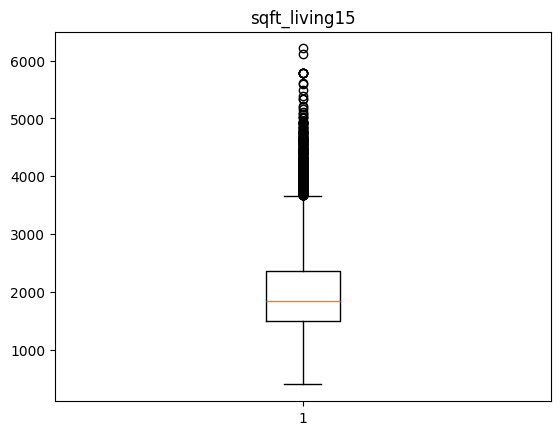

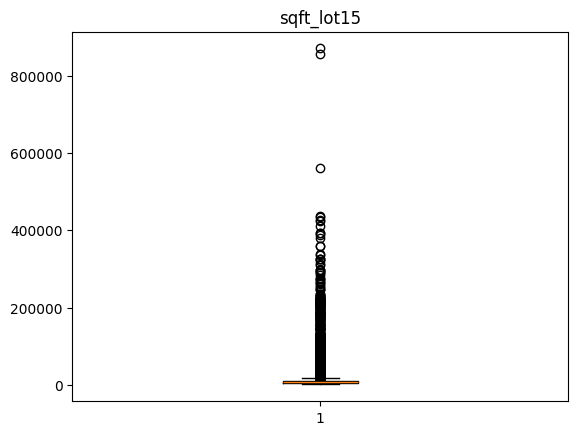

In [78]:
for i in df.columns:
  if df[i].dtype != 'object':
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [79]:
#removing outliers
for i in df.columns:
  if df[i].dtype != 'object':
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    iqr = Q3-Q1
    lower_limit = Q1 - 1.5*iqr
    upper_limit = Q3 + 1.5*iqr

  df = df[(df[i] >= lower_limit) & (df[i] <= upper_limit)]

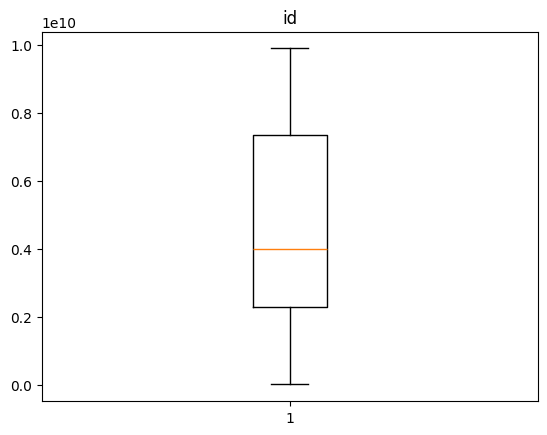

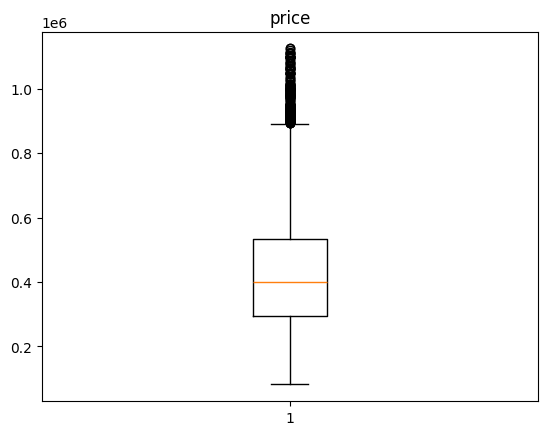

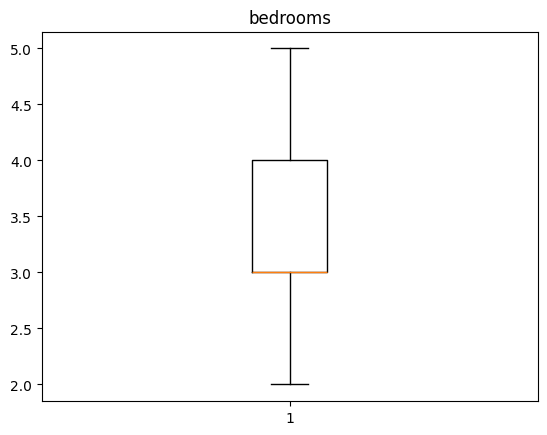

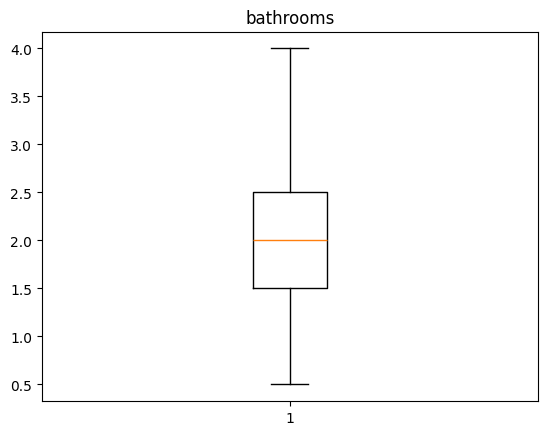

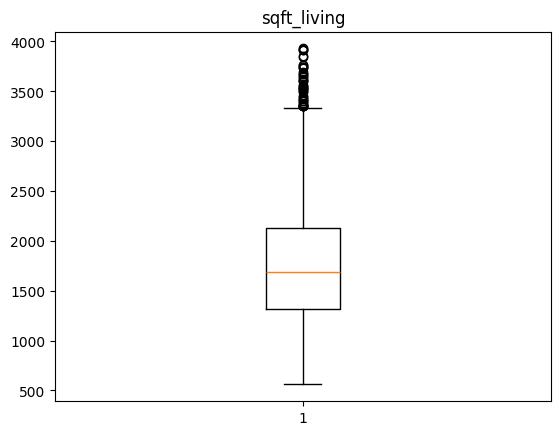

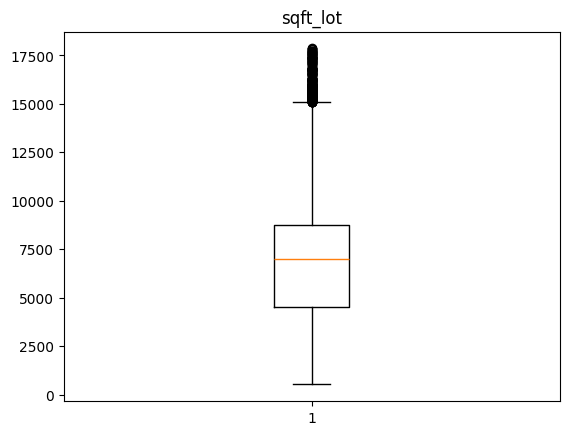

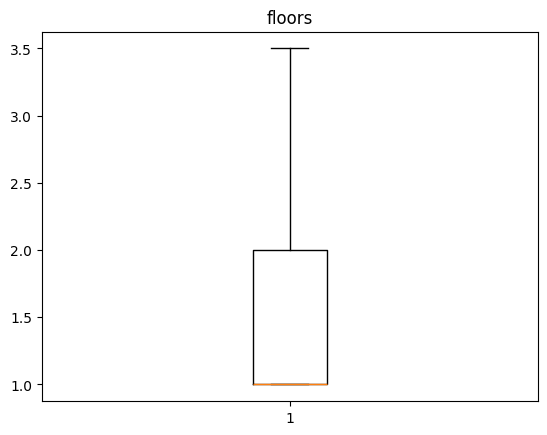

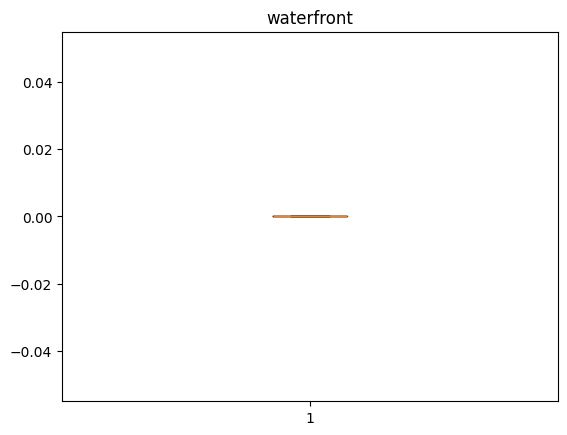

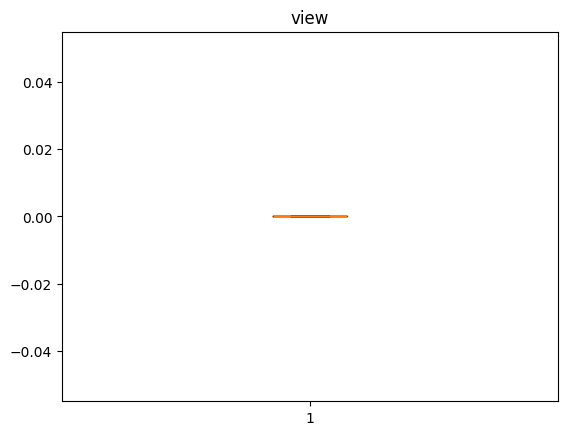

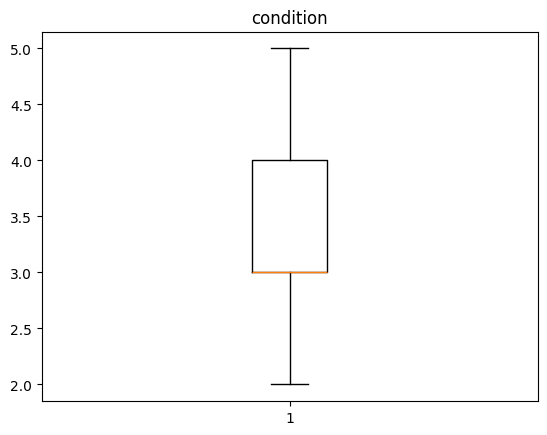

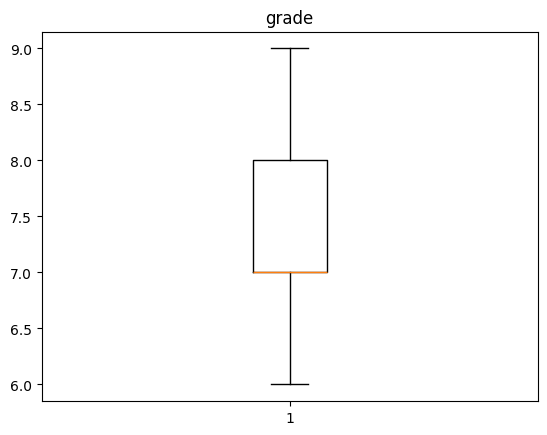

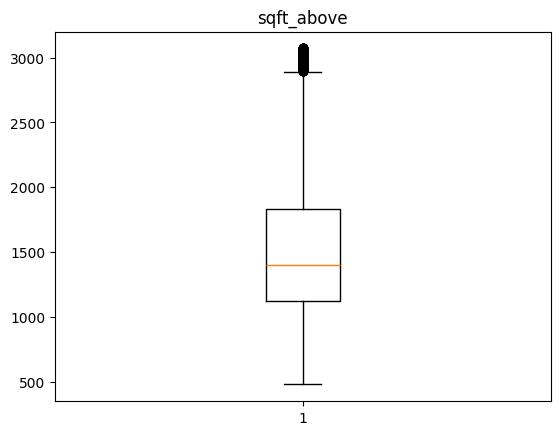

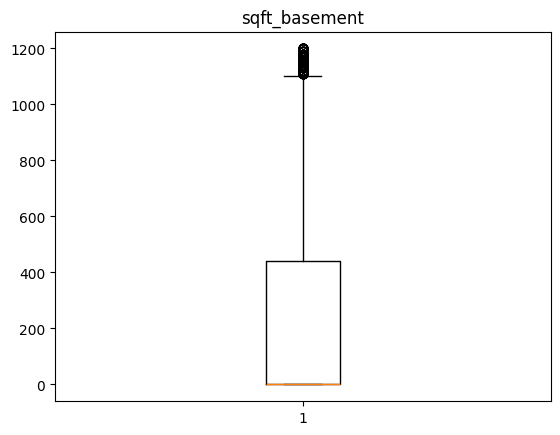

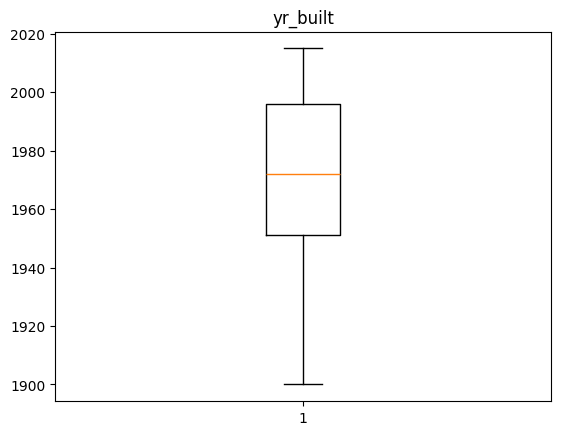

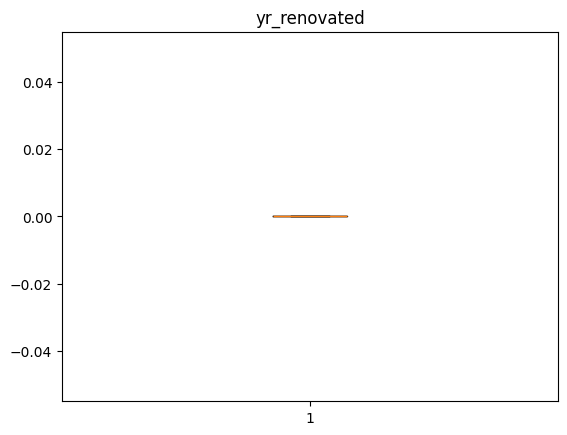

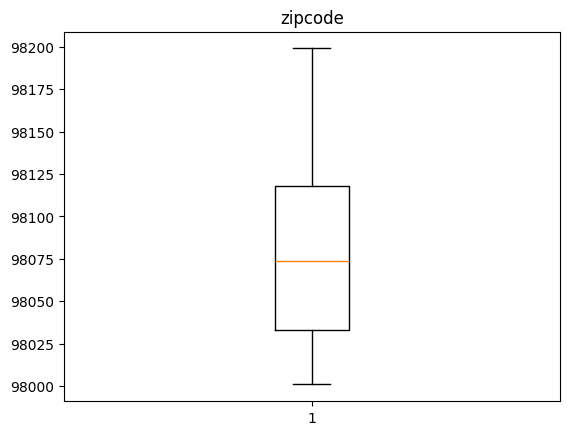

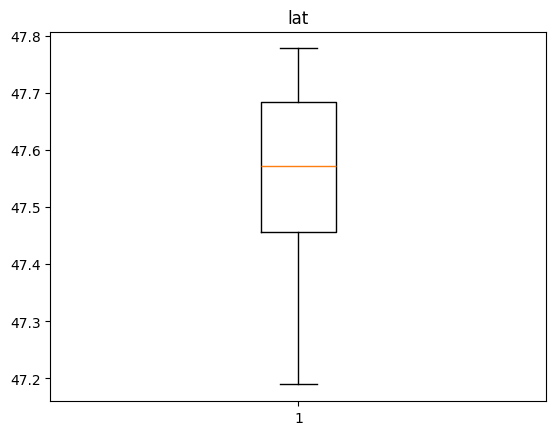

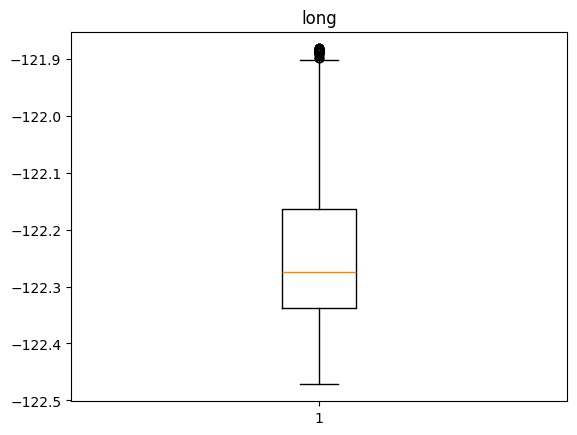

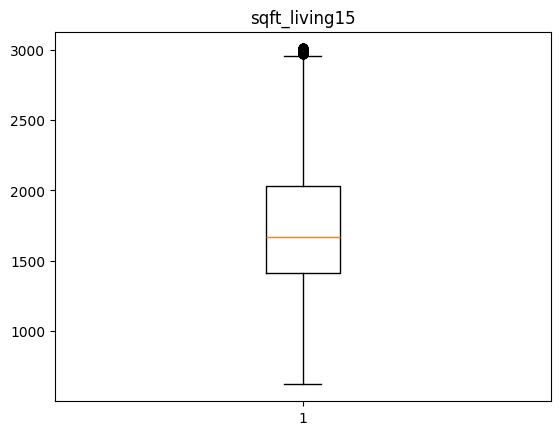

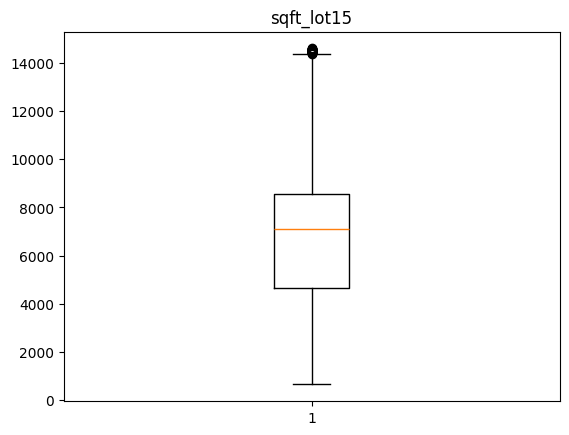

In [80]:
for i in df.columns:
  if df[i].dtype != 'object':
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()


In [81]:
df.shape

(13868, 20)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13868 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             13868 non-null  int64  
 1   price          13868 non-null  int64  
 2   bedrooms       13868 non-null  int64  
 3   bathrooms      13868 non-null  float64
 4   sqft_living    13868 non-null  int64  
 5   sqft_lot       13868 non-null  int64  
 6   floors         13868 non-null  float64
 7   waterfront     13868 non-null  int64  
 8   view           13868 non-null  int64  
 9   condition      13868 non-null  int64  
 10  grade          13868 non-null  int64  
 11  sqft_above     13868 non-null  int64  
 12  sqft_basement  13868 non-null  int64  
 13  yr_built       13868 non-null  int64  
 14  yr_renovated   13868 non-null  int64  
 15  zipcode        13868 non-null  int64  
 16  lat            13868 non-null  float64
 17  long           13868 non-null  float64
 18  sqft_living

In [83]:
# converting data type from float to int.

df[["bathrooms","floors","lat","long"]] = df[["bathrooms","floors","lat","long"]].astype(int)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13868 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             13868 non-null  int64
 1   price          13868 non-null  int64
 2   bedrooms       13868 non-null  int64
 3   bathrooms      13868 non-null  int64
 4   sqft_living    13868 non-null  int64
 5   sqft_lot       13868 non-null  int64
 6   floors         13868 non-null  int64
 7   waterfront     13868 non-null  int64
 8   view           13868 non-null  int64
 9   condition      13868 non-null  int64
 10  grade          13868 non-null  int64
 11  sqft_above     13868 non-null  int64
 12  sqft_basement  13868 non-null  int64
 13  yr_built       13868 non-null  int64
 14  yr_renovated   13868 non-null  int64
 15  zipcode        13868 non-null  int64
 16  lat            13868 non-null  int64
 17  long           13868 non-null  int64
 18  sqft_living15  13868 non-null  int64
 19  sqft_lot1

In [85]:
# model building
# import the libraries
# split the data into x and y
# train_test_split
# train
# test
# evaluate - r2 score , mse ,mae, rmse

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Prepare data
X = df.drop(columns='price')   # features
y = df['price']                # target




X_train: (11094, 19)
y_train: (11094,)


In [98]:
# Step 2: Correct split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Step 3: Check shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (11094, 19)
y_train: (11094,)


In [100]:
# Step 4: Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
# prediction
y_pred = lr.predict(X_test)
y_pred

array([279007.0302076 , 294443.91787129, 426308.20225707, ...,
       327673.68982284, 442485.29801092, 377856.5118288 ])

In [116]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [124]:
#R2 score
r2 = r2_score(y_test, y_pred)
print(r2)
print("="*50)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
print("="*50)
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

0.4957290229268687
97001.43978614382
15401601243.1398
